In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

Goal for step 1: run through document by column. Column A: day (int), column B(string). time, column c: height in feel (float)

In [2]:
dataset = "ASTR19_S22_group_project_data(1).txt"
infile = open(dataset, 'r+')
lines = infile.readlines()

days = np.array(['        '])
time = np.array(['        '])
height = np.array(['       '])
for line in lines:
    sline = line.strip().split()
    #print(sline) 
    days = np.insert(days, 0, sline[0])
    time = np.insert(time, 0, sline[1])
    height = np.insert(height, 0, sline[2])
infile.close()
days = np.flip(days)
time = np.flip(time)
height = np.flip(height)
days = days[4:]
time = time[4:]
height = height[4:]
print(days)
print(time)
print(height)


['1' '1' '2' '2' '3' '3' '4' '4' '5' '5' '6' '6' '7' '7' '8' '8' '9' '9'
 '10' '10' '11' '11' '12' '12' '13' '13' '14' '14' '15' '15' '16' '16'
 '17' '17' '18' '18' '19' '19' '20' '20' '21' '21' '22' '22' '23' '23'
 '24' '24' '25' '25' '26' '26' '27' '27' '28' '28' '29' '29' '30' '30'
 '31' '31' '32' '32' '33' '33' '34' '34' '35' '35' '36' '36' '37' '37'
 '38' '38' '39' '39' '40' '40' '41' '41']
['8:07' '15:37' '8:55' '16:25' '9:45' '17:14' '10:35' '18:00' '11:28'
 '18:46' '12:22' '19:31' '13:24' '20:16' '3:22' '21:01' '4:07' '21:46'
 '4:50' '11:58' '5:31' '12:56' '6:08' '13:45' '6:47' '14:25' '7:22'
 '15:00' '7:59' '15:34' '8:34' '16:08' '9:10' '16:41' '9:45' '17:12'
 '10:21' '17:45' '10:57' '18:15' '11:38' '18:48' '12:25' '19:20' '2:22'
 '19:52' '2:58' '20:30' '3:37' '10:44' '4:23' '11:55' '5:15' '12:57'
 '6:09' '13:50' '7:05' '14:39' '7:58' '15:27' '8:50' '16:10' '9:40'
 '16:52' '10:30' '17:34' '11:19' '18:12' '12:10' '18:49' '1:32' '19:24'
 '2:13' '20:00' '2:54' '9:54' '3:39' '11:1

deletion of useless info

x axis = days


 and convertion of strings to floats

In [3]:
fDays = days.astype(float)
#print(fDays)
fHeight = height.astype(float)
#print(fHeight)
fHours = np.array([])
for i in time:
    splitTime = i.split(':')
    hoursMinutes = float(splitTime[0]) + (float(splitTime[1])/60.0)
    hoursMinutes = hoursMinutes/24
    fHours = np.append(fHours, hoursMinutes)
    #print(splitTime)
    
print(fHours)

[0.33819444 0.65069444 0.37152778 0.68402778 0.40625    0.71805556
 0.44097222 0.75       0.47777778 0.78194444 0.51527778 0.81319444
 0.55833333 0.84444444 0.14027778 0.87569444 0.17152778 0.90694444
 0.20138889 0.49861111 0.22986111 0.53888889 0.25555556 0.57291667
 0.28263889 0.60069444 0.30694444 0.625      0.33263889 0.64861111
 0.35694444 0.67222222 0.38194444 0.69513889 0.40625    0.71666667
 0.43125    0.73958333 0.45625    0.76041667 0.48472222 0.78333333
 0.51736111 0.80555556 0.09861111 0.82777778 0.12361111 0.85416667
 0.15069444 0.44722222 0.18263889 0.49652778 0.21875    0.53958333
 0.25625    0.57638889 0.29513889 0.61041667 0.33194444 0.64375
 0.36805556 0.67361111 0.40277778 0.70277778 0.4375     0.73194444
 0.47152778 0.75833333 0.50694444 0.78402778 0.06388889 0.80833333
 0.09236111 0.83333333 0.12083333 0.4125     0.15208333 0.46875
 0.18680556 0.51527778 0.22291667 0.55138889]


[ 0.    6.57 -0.39  5.38 -1.74  5.26 -1.36  4.13 -1.15  3.48 -1.61  2.62
  0.05  1.83  1.01  3.57  0.73  4.54  2.17  3.76  2.88  3.9   1.92  4.73
  1.74  5.66  0.79  5.33 -0.04  5.23 -1.12  6.67 -0.61  4.74 -0.93  4.69
 -1.29  4.2   0.22  3.68  0.26  2.47  0.36  2.59  0.99  4.1   1.87  3.17
  1.6   3.71  3.1   4.04  2.49  4.07  2.18  5.93  0.7   6.89  0.21  6.72
  0.22  6.77 -1.68  5.77 -1.32  4.35 -0.73  4.23 -0.38  2.24 -0.61  3.45
 -0.46  4.13  1.21  3.34  2.58  3.32  3.26  5.21  2.39  4.83  2.41]


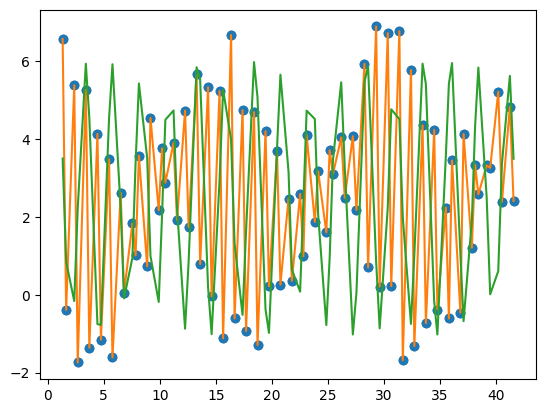

In [5]:
dayMinutes = np.array([0.0])
for i in range(82):
    dayTime = fDays[i]+fHours[i]
    dayMinutes = np.append(dayMinutes, dayTime)

dayMinutes = dayMinutes[1:]
plt.scatter(dayMinutes, fHeight)
plt.plot(dayMinutes, fHeight, 'o')
y_err = 0.25
highTides = np.array([0.0])
highCounter = 0
while highCounter < 82:
    highTides = np.append(highTides, fHeight[highCounter])
    highCounter = highCounter + 1
    
print(highTides)
x = dayMinutes
plt.plot(dayMinutes, fHeight)

heightMean = np.mean(fHeight)
pNaught = [3.5,2.5,-0.5, heightMean]

def sinX(x, a, b, c, d):
    return (a * (np.sin((b * x) + c))) + d 
 

param, param_cov = optimize.curve_fit(sinX, x, fHeight, p0 = pNaught)

fit = sinX(dayMinutes, *pNaught)

plt.plot(dayMinutes, fit)


2.5228712473483523
2.3501944870958797


(array([2., 0., 2., 1., 4., 2., 5., 7., 9., 6., 3., 5., 3., 1., 5., 3., 2.,
        1., 2., 4.]),
 array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
         0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <BarContainer object of 20 artists>)

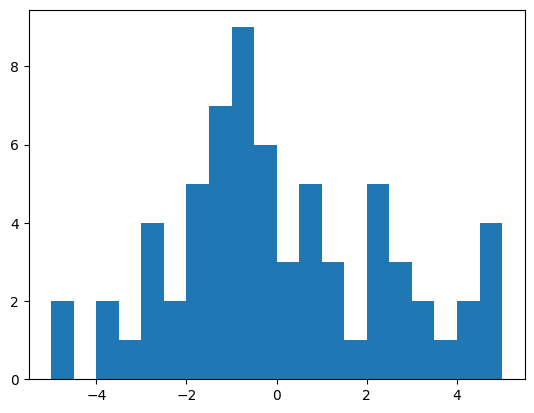

In [14]:
res = fHeight - fit
fit_std = np.std(fit)
mean_fit = np.mean(fit)
print(be)
print(u)
plt.hist(res, bins=20,range=(-5,5))


In [16]:
outlier = fHeight[26]+2
print(outlier)
h = (outlier-mean_fit)/fit_std
print(f"The outlier is approx. {h} deviations away from the mean of the model.")

7.33
The outlier is approx. 2.045417423556204 deviations away from the mean of the model.


[ 3.49958713  0.84611925 -0.16124853  2.22261511  5.93266715  4.53927846
 -0.7546898  -0.77277856  4.53484812  5.92029161  2.19778473 -0.09267881
  0.94419191  3.38333374  5.42559223  3.51900617  0.99488409 -0.18640351
  2.02711019  4.49417712  4.73220081  2.22340932 -0.87177539  0.85079188
  5.84186517  5.52429437  0.1972941  -1.01412961  2.9406362   5.2680129
  3.99544904  1.31157933 -0.51762401  1.63121343  5.97583617  5.06629729
 -0.37725842 -0.98014001  3.76071075  5.65198801  3.15740109  0.6451345
  0.07910699  2.35659116  4.7273208   4.51423943  2.06358349 -0.77930388
  0.93980688  3.46638197  5.45488311  3.28345822 -1.02169519  0.05168766
  5.47085763  5.86499278  0.85829113 -0.86394857  2.23921     4.76276526
  4.51099683  1.97530034 -0.75039875  1.03687751  5.93444539  5.4104003
 -0.16458293 -1.02170007  3.52186076  5.41485424  5.95127541  1.06826063
 -0.67921491  1.90532133  4.32052261  5.83481055  2.51036598  0.01059512
  0.60743919  3.36870043  5.62138998  3.49281873  7.33

(array([12.,  6.,  3.,  9.,  2.,  5.,  6.,  1.,  9.,  2.,  6.,  4.,  9.,
         8.,  0.,  1.]),
 array([-1.02170007, -0.49971881,  0.02226244,  0.5442437 ,  1.06622495,
         1.5882062 ,  2.11018746,  2.63216871,  3.15414997,  3.67613122,
         4.19811247,  4.72009373,  5.24207498,  5.76405624,  6.28603749,
         6.80801875,  7.33      ]),
 <BarContainer object of 16 artists>)

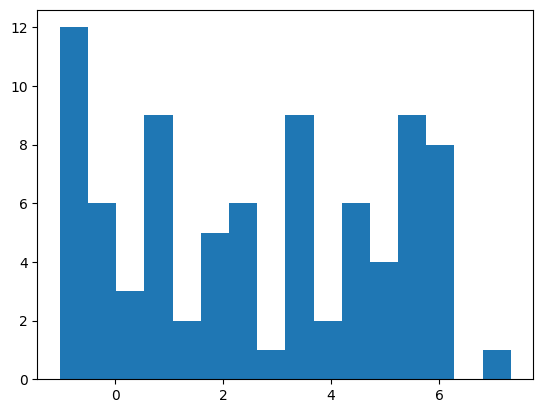

In [22]:
data_hist = np.copy(fit)
data_hist = np.append(data_hist, outlier)
print(data_hist)
plt.hist(data_hist, bins=16)